In [1]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_gflops(csv_path, device_query_csv_path="benchmarks/device_info.csv"):
    # Load benchmark data
    df = pd.read_csv(csv_path)

    # Load device info
    dev_info = pd.read_csv(device_query_csv_path)
    theoretical_gflops = dev_info["theoretical_gflops"].iloc[0]
    device_name = dev_info["name"].iloc[0]

    print(f"Using device: {device_name}")
    print(f"Theoretical FP32 peak: {theoretical_gflops:.1f} GFLOPs")

    seq_lens = sorted(df["seq_len"].unique())
    num_heads = sorted(df["num_heads"].unique())

    plt.style.use("seaborn-v0_8-whitegrid")
    fig, axes = plt.subplots(
        1, len(seq_lens), figsize=(6 * len(seq_lens), 5), sharey=True
    )
    if len(seq_lens) == 1:
        axes = [axes]

    for ax, seq_len in zip(axes, seq_lens):
        subset = df[df["seq_len"] == seq_len]
        for h in num_heads:
            group = subset[subset["num_heads"] == h].sort_values("head_dim")
            ax.plot(group["head_dim"], group["gflops"], marker="o", label=f"heads={h}")

        ax.axhline(
            y=theoretical_gflops, color="r", linestyle="--", label="Theoretical Peak"
        )
        ax.set_title(f"Sequence Length = {seq_len}")
        ax.set_xlabel("Head Dim")
        ax.set_xscale("log", base=2)
        ax.set_ylabel("GFLOPs/s")
        ax.legend()

    plt.suptitle(f"Attention GFLOPs vs Head Dim ({device_name})", fontsize=14)
    plt.tight_layout()
    plt.show()

### Vanilla Custom Batched and Strided GEMM

Using device: Quadro T2000
Theoretical FP32 peak: 6635.5 GFLOPs


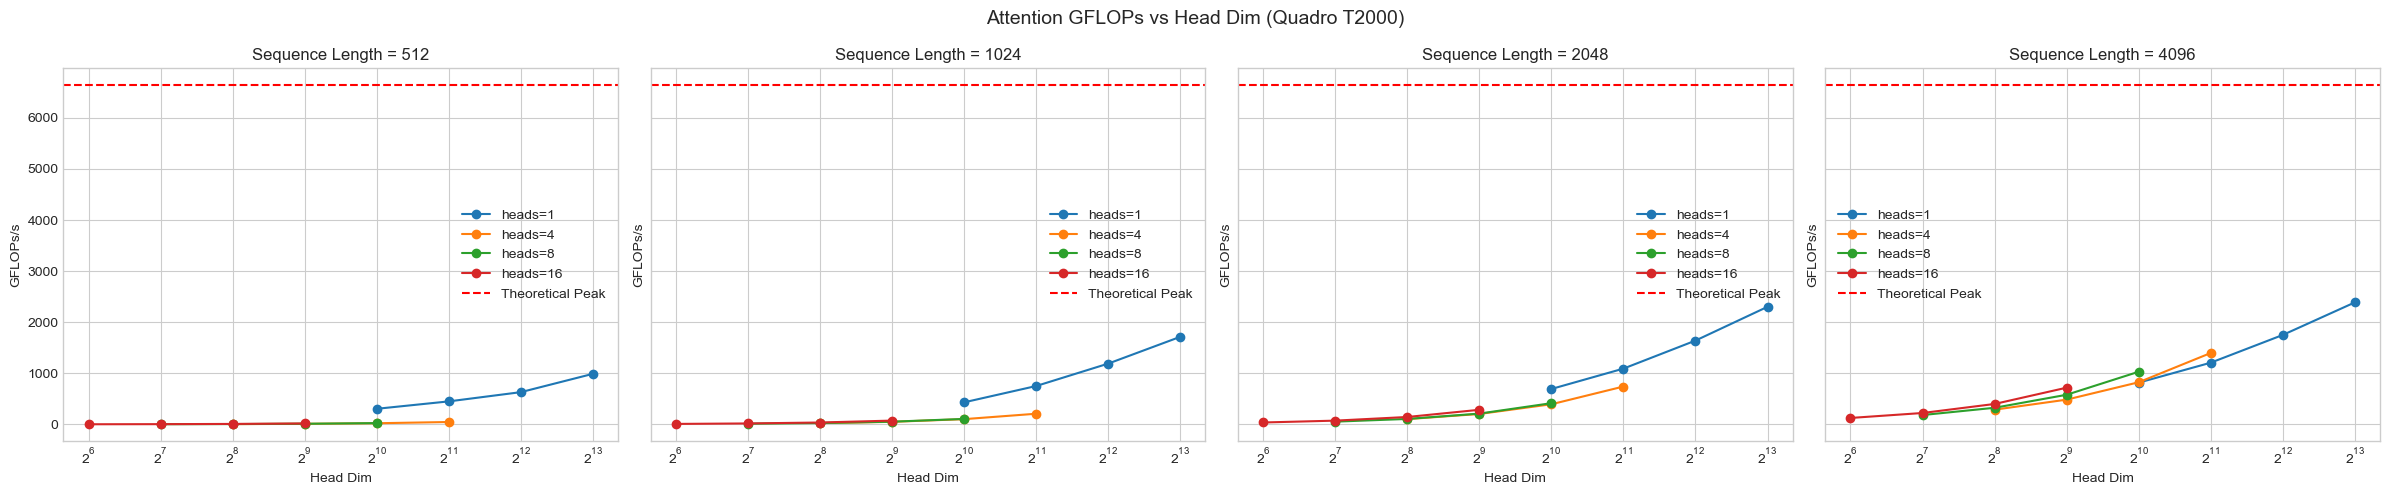

In [2]:
plot_gflops("benchmarks/vanilla_Quadro_T2000_sm75.csv")

### Vanilla V2 Custom Batched and Strided GEMM

Using device: Quadro T2000
Theoretical FP32 peak: 6635.5 GFLOPs


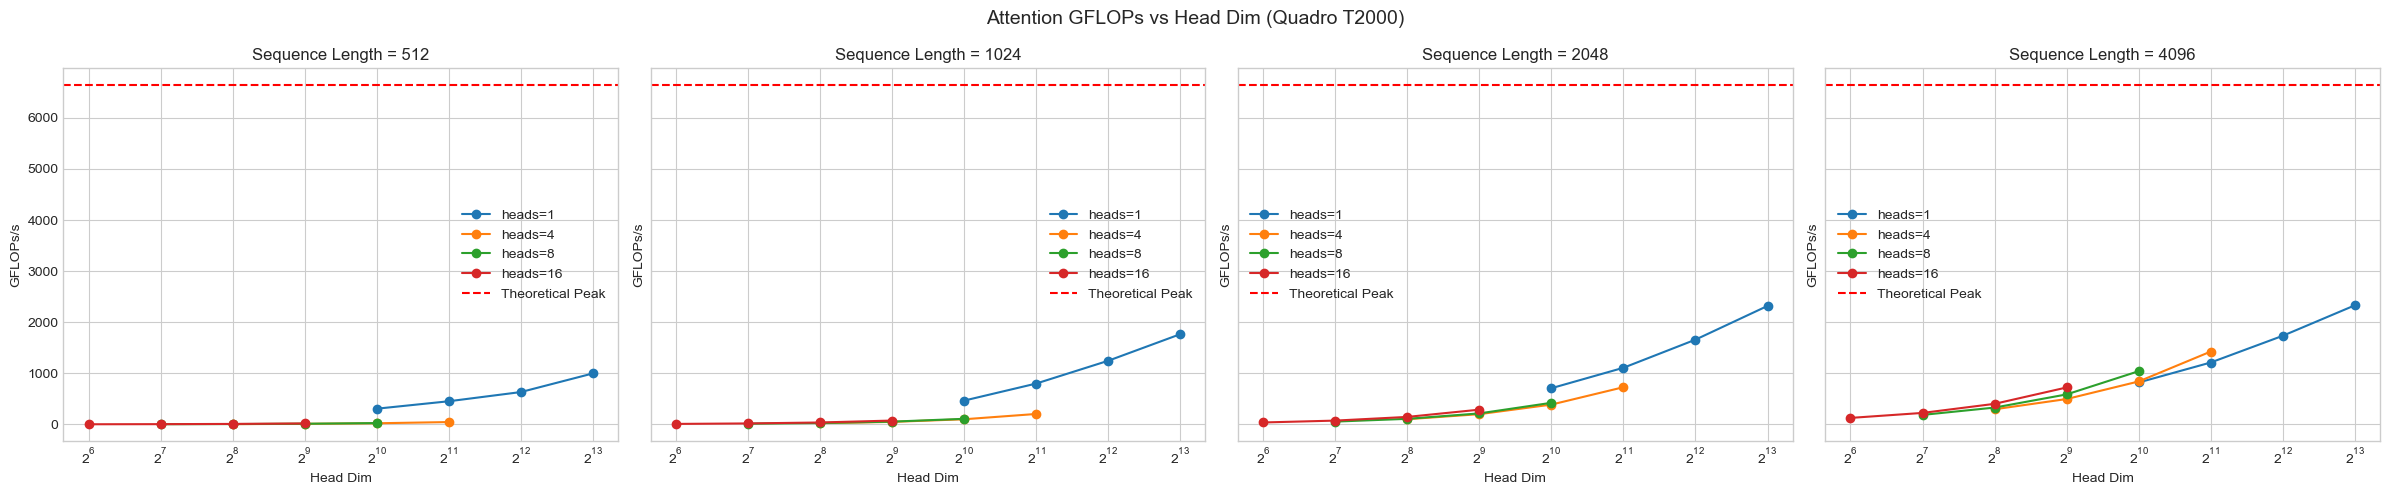

In [3]:
plot_gflops("benchmarks/vanilla_v2_Quadro_T2000_sm75.csv")

### cuBLAS batched and strided GEMM

Using device: Quadro T2000
Theoretical FP32 peak: 6635.5 GFLOPs


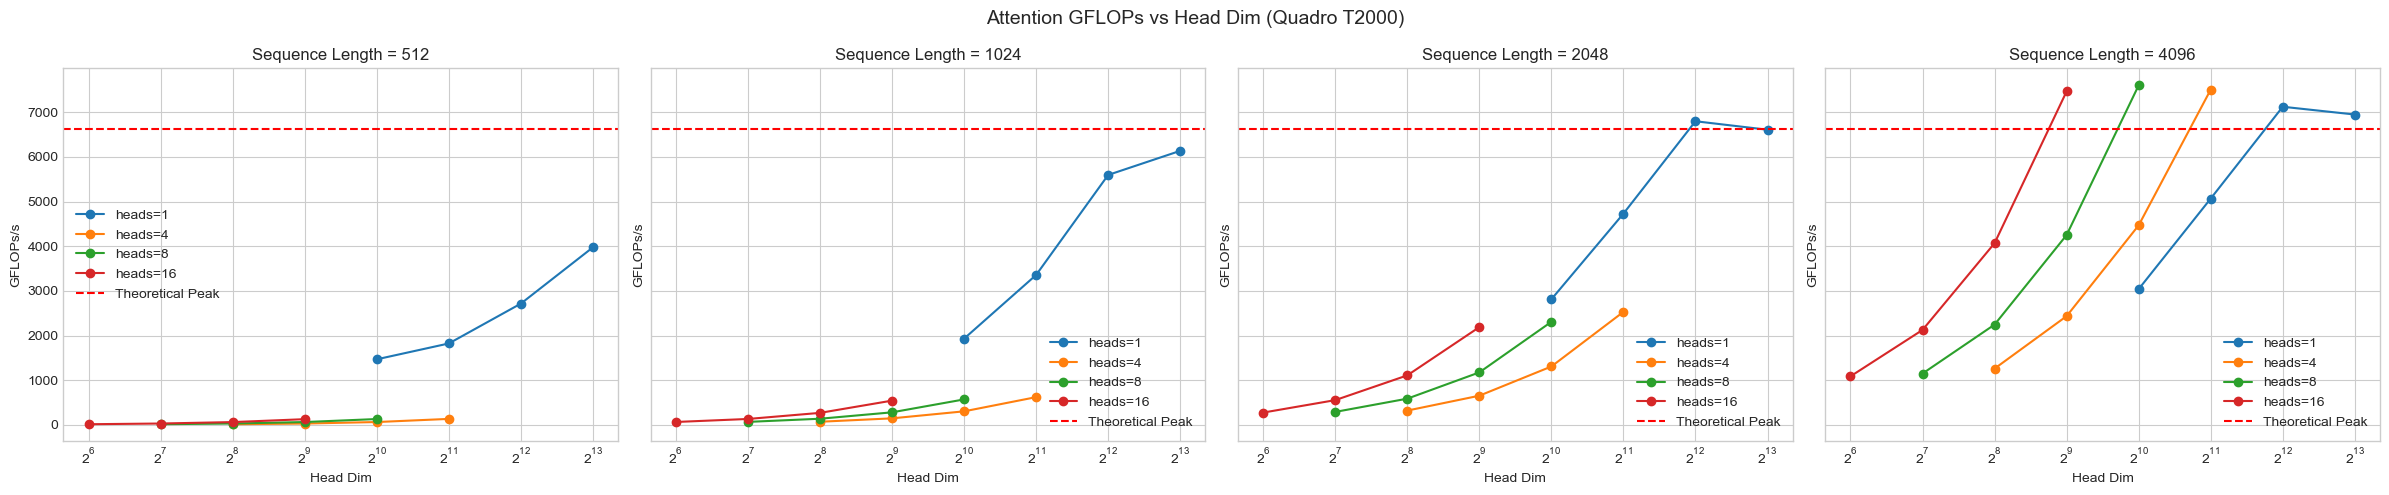

In [4]:
plot_gflops("benchmarks/vanilla_cublas_Quadro_T2000_sm75.csv")